<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/CHOQUEPATA_MAMANI_YOEL_YHONATAN_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar archivos
df1 = pd.read_csv('index_1.csv')
df2 = pd.read_csv('index_2.csv')

# Añadir columna faltante si es necesario
if 'card' not in df2.columns:
    df2['card'] = None

# Unir los datasets
df = pd.concat([df1, df2], ignore_index=True)


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

try:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
except ValueError as e:
    print(f"Error al convertir las fechas: {e}")
    # Aquí puedes agregar código para manejar el error, por ejemplo,
    # imprimir las filas problemáticas o registrar el error.

try:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
except ValueError as e:
    print(f"Error al convertir las fechas: {e}")
    # Aquí puedes agregar código para manejar el error, por ejemplo,
    # imprimir las filas problemáticas o registrar el error.

    # Convertir columnas a datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
    # Verificar
print(df.head())
print(df.info())


        date datetime cash_type                 card  money    coffee_name
0 2024-03-01      NaT      card  ANON-0000-0000-0001   38.7          Latte
1 2024-03-01      NaT      card  ANON-0000-0000-0002   38.7  Hot Chocolate
2 2024-03-01      NaT      card  ANON-0000-0000-0002   38.7  Hot Chocolate
3 2024-03-01      NaT      card  ANON-0000-0000-0003   28.9      Americano
4 2024-03-01      NaT      card  ANON-0000-0000-0004   38.7          Latte
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3898 non-null   datetime64[ns]
 1   datetime     262 non-null    datetime64[ns]
 2   cash_type    3898 non-null   object        
 3   card         3547 non-null   object        
 4   money        3898 non-null   float64       
 5   coffee_name  3898 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
mem

Realizar Análisis Exploratorio de Datos (EDA) utilizando visualizaciones para entender los patrones.

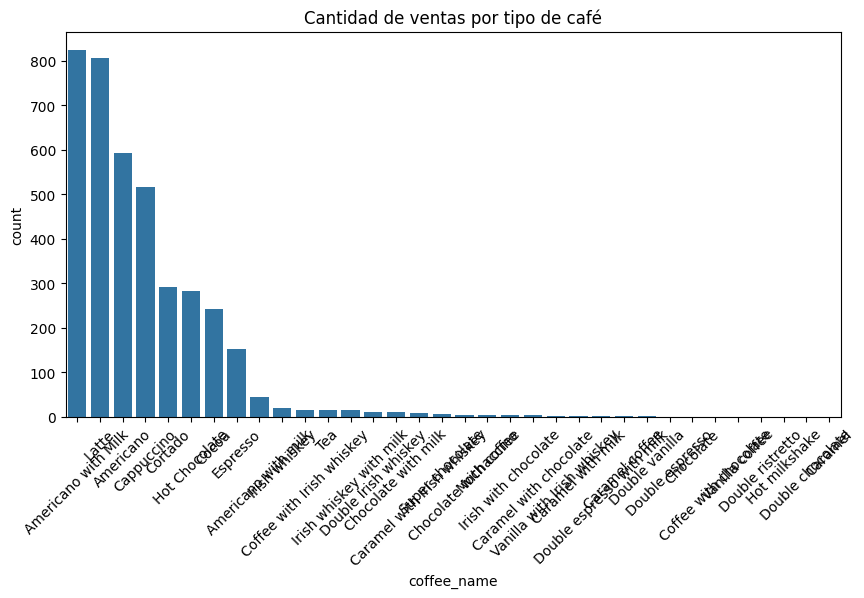

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Cantidad de ventas por tipo de café')
plt.xticks(rotation=45)
plt.show()


ventas por dia y semana

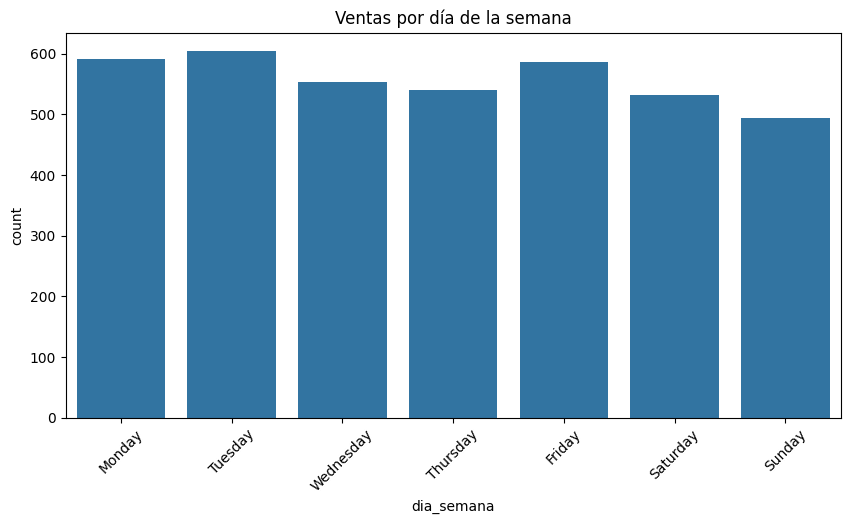

In [ ]:
df['dia_semana'] = df['date'].dt.day_name()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dia_semana', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Ventas por día de la semana')
plt.xticks(rotation=45)
plt.show()


Ingeniería de Características: Extraer mes, día de la semana, hora del datetime. Crear cantidad_total_vendida_no_dia (suma de money por día).

In [ ]:
# Extraer nuevas características
df['mes'] = df['datetime'].dt.month
df['hora'] = df['datetime'].dt.hour
df['dia_semana'] = df['datetime'].dt.day_name()

# Agregar total vendido por día
df['cantidad_total_vendida_en_dia'] = df.groupby('date')['money'].transform('sum')

# También podrías agregar si es fin de semana
df['es_fin_de_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday']).astype(int)



codificacion y division


In [ ]:
import pandas as pd

# ... tu código para cargar el archivo CSV en el DataFrame 'df' ...

# Renombra la columna 'money' a 'precio_unitario'
df = df.rename(columns={'money': 'precio_unitario'}, inplace=False)

# Selecciona las columnas necesarias para df_modelo
df_modelo = df[['coffee_name', 'precio_unitario', 'mes', 'hora', 'dia_semana', 'es_fin_de_semana', 'cantidad_total_vendida_en_dia']]

# ... resto de tu código ...


Codificación de Variables Categóricas

Dividir los datos en conjuntos de entrenamiento y prueba.


In [ ]:
from sklearn.model_selection import train_test_split

X = df_modelo.drop(columns=['cantidad_total_vendida_en_dia'])
y = df_modelo['cantidad_total_vendida_en_dia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (3118, 6)
Tamaño de prueba: (780, 6)


In [ ]:
print(df.dtypes)

date                             datetime64[ns]
datetime                         datetime64[ns]
cash_type                                object
card                                     object
precio_unitario                         float64
coffee_name                              object
dia_semana                               object
mes                                     float64
hora                                    float64
cantidad_total_vendida_en_dia           float64
es_fin_de_semana                          int64
dtype: object


In [ ]:
print(X_train.dtypes)


coffee_name          object
precio_unitario     float64
mes                 float64
hora                float64
dia_semana           object
es_fin_de_semana      int64
dtype: object


In [ ]:
X = pd.get_dummies(X, columns=['coffee_name', 'dia_semana'], drop_first=True)


In [ ]:
X = X.astype(np.float32)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

modelo_total = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


2. Modelado Predictivo (con TensorFlow Keras)

2. Construir y entrenar un modelo de red neuronal (utilizando TensorFlow Keras) para prever la cantidad_total_vendida_no_dia.

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Realizar predicciones
y_pred_total = modelo_total.predict(X_test)



# Modelo
modelo_total = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regresión
])

modelo_total.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
modelo_total.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - m

evaluacion por cafe

In [ ]:
print("NaNs en y_test:", y_test.isna().sum())
print("NaNs en y_pred_total:", np.isnan(y_pred_total).sum())

NaNs en y_test: 0
NaNs en y_pred_total: 780


In [ ]:
# Eliminar filas con NaN en y_test
mask = ~y_test.isna()
y_test_clean = y_test[mask]
y_pred_clean = y_pred_total[mask]


In [ ]:
print("Ejemplos de entrada X_test con posibles problemas:")
print(X_test[np.isnan(y_pred_total).flatten()])


Ejemplos de entrada X_test con posibles problemas:
      precio_unitario  mes  hora  es_fin_de_semana  \
3685        25.000000  2.0  15.0               1.0   
912         37.720001  NaN   NaN               0.0   
321         38.700001  NaN   NaN               0.0   
2098        25.959999  NaN   NaN               0.0   
1480        23.020000  NaN   NaN               0.0   
...               ...  ...   ...               ...   
2382        35.759998  NaN   NaN               0.0   
802         32.820000  NaN   NaN               0.0   
247         33.799999  NaN   NaN               0.0   
2941        25.959999  NaN   NaN               0.0   
1003        32.820000  NaN   NaN               0.0   

      coffee_name_Americano with Milk  coffee_name_Americano with milk  \
3685                              0.0                              1.0   
912                               0.0                              0.0   
321                               0.0                              0.0   
2098

In [ ]:
print("NaNs en y_test:", y_test.isna().sum())
print("NaNs en y_pred_total:", np.isnan(y_pred_total).sum())
print("Tamaño total y_test:", len(y_test))


NaNs en y_test: 0
NaNs en y_pred_total: 780
Tamaño total y_test: 780


In [ ]:
print(X_test.dtypes)
print(X_test.isna().sum().sum())  # total de NaNs
print(np.any(np.isnan(X_test.values)))  # True si hay algún NaN


precio_unitario                           float32
mes                                       float32
hora                                      float32
es_fin_de_semana                          float32
coffee_name_Americano with Milk           float32
coffee_name_Americano with milk           float32
coffee_name_Cappuccino                    float32
coffee_name_Caramel                       float32
coffee_name_Caramel coffee                float32
coffee_name_Caramel with Irish whiskey    float32
coffee_name_Caramel with chocolate        float32
coffee_name_Caramel with milk             float32
coffee_name_Chocolate                     float32
coffee_name_Chocolate with coffee         float32
coffee_name_Chocolate with milk           float32
coffee_name_Cocoa                         float32
coffee_name_Coffee with Irish whiskey     float32
coffee_name_Coffee with chocolate         float32
coffee_name_Cortado                       float32
coffee_name_Double Irish whiskey          float32


In [ ]:
# Limpiar antes de entrenar
X = X.dropna()
y = y.loc[X.index]  # sincronizar

# Convertir a tipo float
X = X.astype(np.float32)


In [ ]:
print("Primeros valores de y_test:")
print(y_test.head())

print("\nPrimeros valores de y_pred_total:")
print(y_pred_total.head() if isinstance(y_pred_total, pd.Series) else y_pred_total[:5])

print("\nRecuento de NaNs:")
print("NaNs en y_test:", y_test.isna().sum())
print("NaNs en y_pred_total:", y_pred_total.isna().sum() if isinstance(y_pred_total, pd.Series) else np.isnan(y_pred_total).sum())


Primeros valores de y_test:
3685    466.44
912     310.08
321     352.70
2098    513.36
1480    579.94
Name: cantidad_total_vendida_en_dia, dtype: float64

Primeros valores de y_pred_total:
3685   NaN
912    NaN
321    NaN
2098   NaN
1480   NaN
dtype: float32

Recuento de NaNs:
NaNs en y_test: 0
NaNs en y_pred_total: 780


In [ ]:
print("NaNs en X_test:", X_test.isna().sum().sum())


NaNs en X_test: 1438


In [ ]:
# Limpiar X e y antes del split
X = X.dropna()
y = y.loc[X.index]

# Convertir todo a float
X = X.astype(np.float32)

# Luego dividir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import pandas as pd

# Asegurarse de que y_pred_total es una Serie
if isinstance(y_pred_total, np.ndarray):
    y_pred_total = pd.Series(y_pred_total.flatten(), index=y_test.index)

# Diagnóstico
print("Total muestras en y_test:", len(y_test))
print("Total muestras en y_pred_total:", len(y_pred_total))
print("\nNaNs en y_test:", y_test.isna().sum())
print("NaNs en y_pred_total:", y_pred_total.isna().sum())

# Máscara válida
mask = (~y_test.isna()) & (~y_pred_total.isna())
print("\nTotal muestras válidas (sin NaN):", mask.sum())

# Mostrar ejemplos si existen
if mask.sum() > 0:
    print("\nEjemplo de valores válidos:")
    print(pd.concat([y_test[mask], y_pred_total[mask]], axis=1).head())
else:
    print("⚠️ No hay ninguna fila sin NaN. El modelo probablemente falló por problemas en X_test.")


Total muestras en y_test: 53
Total muestras en y_pred_total: 780

NaNs en y_test: 0
NaNs en y_pred_total: 780

Total muestras válidas (sin NaN): 0
⚠️ No hay ninguna fila sin NaN. El modelo probablemente falló por problemas en X_test.


In [63]:
print(df.columns)


Index(['date', 'datetime', 'cash_type', 'card', 'precio_unitario',
       'dia_semana', 'mes', 'hora', 'cantidad_total_vendida_en_dia',
       'es_fin_de_semana', 'coffee_name_Americano with Milk',
       'coffee_name_Americano with milk', 'coffee_name_Cappuccino',
       'coffee_name_Caramel', 'coffee_name_Caramel coffee',
       'coffee_name_Caramel with Irish whiskey',
       'coffee_name_Caramel with chocolate', 'coffee_name_Caramel with milk',
       'coffee_name_Chocolate', 'coffee_name_Chocolate with coffee',
       'coffee_name_Chocolate with milk', 'coffee_name_Cocoa',
       'coffee_name_Coffee with Irish whiskey',
       'coffee_name_Coffee with chocolate', 'coffee_name_Cortado',
       'coffee_name_Double Irish whiskey', 'coffee_name_Double chocolate',
       'coffee_name_Double espresso', 'coffee_name_Double espresso with milk',
       'coffee_name_Double ristretto', 'coffee_name_Double vanilla',
       'coffee_name_Espresso', 'coffee_name_Hot Chocolate',
       'coffee_na

In [65]:
df1 = pd.read_csv('index_1.csv', sep='\t')  # ajusta el separador según el archivo
df2 = pd.read_csv('index_2.csv', sep='\t')

# Unir ambos
df = pd.concat([df1, df2], ignore_index=True)

print(df.columns)  # confirma que 'coffee_name' esté aquí


Index(['date,datetime,cash_type,card,money,coffee_name', 'date,datetime,cash_type,money,coffee_name'], dtype='object')


In [67]:
print([col.lower() for col in df.columns])


['date,datetime,cash_type,card,money,coffee_name', 'date,datetime,cash_type,money,coffee_name']


In [68]:
df.rename(columns={'coffee_Name': 'coffee_name'}, inplace=True)


In [71]:
print(df.columns)

Index(['date,datetime,cash_type,card,money,coffee_name', 'date,datetime,cash_type,money,coffee_name'], dtype='object')


In [72]:
import pandas as pd

df1 = pd.read_csv('index_1.csv', sep=',')
df2 = pd.read_csv('index_2.csv', sep=',')

# Revisar columnas
print(df1.columns)
print(df2.columns)

# Unir datasets
df = pd.concat([df1, df2], ignore_index=True)

print(df.columns)  # Ahora debería mostrar columnas correctas


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')
Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Suponiendo que tienes tu DataFrame original 'df' con columnas 'date' y 'coffee_name'

# Agrupar las ventas por fecha y tipo de café
df['date'] = pd.to_datetime(df['date'])
ventas_diarias = df.groupby(['date', 'coffee_name']).size().unstack(fill_value=0)

# Crear variables temporales
ventas_diarias['mes'] = ventas_diarias.index.month
ventas_diarias['dia_semana'] = ventas_diarias.index.dayofweek
ventas_diarias['es_fin_de_semana'] = (ventas_diarias['dia_semana'] >= 5).astype(int)

# Separar X e y
X_multi = ventas_diarias[['mes', 'dia_semana', 'es_fin_de_semana']].astype(np.float32)
y_multi = ventas_diarias.drop(columns=['mes', 'dia_semana', 'es_fin_de_semana']).astype(np.float32)

# Dividir
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [77]:
import tensorflow as tf

# Crear el modelo
modelo_multi = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train2.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train2.shape[1])  # salida múltiple según cantidad de tipos de café
])

modelo_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar
modelo_multi.fit(X_train2, y_train2, epochs=100, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.1624 - mae: 0.6336 - val_loss: 0.8076 - val_mae: 0.4972
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9891 - mae: 0.5036 - val_loss: 0.6884 - val_mae: 0.4432
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8055 - mae: 0.4505 - val_loss: 0.6328 - val_mae: 0.4216
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6739 - mae: 0.4070 - val_loss: 0.5919 - val_mae: 0.3978
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6844 - mae: 0.4022 - val_loss: 0.5584 - val_mae: 0.3748
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6097 - mae: 0.3680 - val_loss: 0.5335 - val_mae: 0.3441
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5858 - mae: 0.3367 - val_loss: 0.5224 - val_mae: 0.3230
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5640 - mae: 0.3153 - val_loss: 0.5171 - val_mae: 0.3102
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6223 - mae: 

In [78]:
y_pred_multi = modelo_multi.predict(X_test2)
# luego tu evaluación...


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [79]:
print("X_test2 shape:", X_test2.shape)
print("y_test2 shape:", y_test2.shape)
print("y_pred_multi shape:", y_pred_multi.shape)
print("y_pred_multi type:", type(y_pred_multi))
print("y_test2 type:", type(y_test2))


X_test2 shape: (77, 3)
y_test2 shape: (77, 34)
y_pred_multi shape: (77, 34)
y_pred_multi type: <class 'numpy.ndarray'>
y_test2 type: <class 'pandas.core.frame.DataFrame'>


In [80]:
y_pred_multi = modelo_multi.predict(X_test2)

for i, coffee in enumerate(y_train2.columns):
    y_true = y_test2[coffee].values
    y_pred = y_pred_multi[:, i]

    print(f"\nCafé: {coffee}")
    print(" MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print(" MSE:", round(mean_squared_error(y_true, y_pred), 2))
    print(" RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print(" R²:", round(r2_score(y_true, y_pred), 2))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Café: Americano
 MAE: 1.36
 MSE: 3.07
 RMSE: 1.75
 R²: 0.2

Café: Americano with Milk
 MAE: 1.62
 MSE: 4.51
 RMSE: 2.12
 R²: -0.0

Café: Americano with milk
 MAE: 0.26
 MSE: 0.3
 RMSE: 0.55
 R²: 0.06

Café: Cappuccino
 MAE: 0.99
 MSE: 1.36
 RMSE: 1.17
 R²: -0.13

Café: Caramel
 MAE: 0.03
 MSE: 0.0
 RMSE: 0.04
 R²: 0.0

Café: Caramel coffee
 MAE: 0.04
 MSE: 0.02
 RMSE: 0.13
 R²: -0.24

Café: Caramel with Irish whiskey
 MAE: 0.08
 MSE: 0.08
 RMSE: 0.28
 R²: -0.01

Café: Caramel with chocolate
 MAE: 0.05
 MSE: 0.03
 RMSE: 0.16
 R²: -0.02

Café: Caramel with milk
 MAE: 0.04
 MSE: 0.01
 RMSE: 0.12
 R²: -0.12

Café: Chocolate
 MAE: 0.01
 MSE: 0.0
 RMSE: 0.02
 R²: 0.0

Café: Chocolate with coffee
 MAE: 0.03
 MSE: 0.0
 RMSE: 0.04
 R²: 0.0

Café: Chocolate with milk
 MAE: 0.08
 MSE: 0.04
 RMSE: 0.19
 R²: 0.02

Café: Cocoa
 MAE: 0.75
 MSE: 0.88
 RMSE: 0.94
 R²: 0.05

Café: Coffee with Irish whiskey
 MAE: 0.1
 MSE: 0.03
 RMSE: 0.17
 R²: -0.09

Café: Coffee w

3. Serialización del Modelo

In [81]:
modelo_total.save('modelo_total.h5')
modelo_multi.save('modelo_multi.h5')


In [83]:
modelo_total.save('modelo_total.keras')
modelo_multi.save('modelo_multi.keras')


In [84]:
modelo_total.save('modelo_total.h5')
modelo_multi.save('modelo_multi.h5')


In [86]:
modelo_total.export('modelo_total_savedmodel')
modelo_multi.export('modelo_multi_savedmodel')


Saved artifact at 'modelo_total_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 43), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134484514716560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134484514703696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134484514717328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134482745345808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134482745347728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134482745344272: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at 'modelo_multi_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 34), dtype=tf.float32, name=None)
Captures:
  13448267

In [87]:
modelo_total.save('modelo_total.h5')
modelo_multi.save('modelo_multi.h5')


In [89]:
modelo_total.save('modelo_total.keras')
modelo_multi.save('modelo_multi.keras')


In [96]:
modelo_total.save('modelo_total.h5')
modelo_multi.save('modelo_multi.h5')


In [91]:
modelo_total.export('modelo_total_savedmodel')
modelo_multi.export('modelo_multi_savedmodel')


Saved artifact at 'modelo_total_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 43), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134484514716560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134484514703696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134484514717328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134482745345808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134482745347728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134482745344272: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at 'modelo_multi_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 34), dtype=tf.float32, name=None)
Captures:
  13448267

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustar con datos (por ejemplo X_train)
scaler.fit(X_train)

# Luego lo guardas
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [104]:
print(X_train.columns)


Index(['precio_unitario', 'mes', 'hora', 'es_fin_de_semana',
       'coffee_name_Americano with Milk', 'coffee_name_Americano with milk',
       'coffee_name_Cappuccino', 'coffee_name_Caramel',
       'coffee_name_Caramel coffee', 'coffee_name_Caramel with Irish whiskey',
       'coffee_name_Caramel with chocolate', 'coffee_name_Caramel with milk',
       'coffee_name_Chocolate', 'coffee_name_Chocolate with coffee',
       'coffee_name_Chocolate with milk', 'coffee_name_Cocoa',
       'coffee_name_Coffee with Irish whiskey',
       'coffee_name_Coffee with chocolate', 'coffee_name_Cortado',
       'coffee_name_Double Irish whiskey', 'coffee_name_Double chocolate',
       'coffee_name_Double espresso', 'coffee_name_Double espresso with milk',
       'coffee_name_Double ristretto', 'coffee_name_Double vanilla',
       'coffee_name_Espresso', 'coffee_name_Hot Chocolate',
       'coffee_name_Hot milkshake', 'coffee_name_Irish whiskey',
       'coffee_name_Irish whiskey with milk',
       '

In [106]:
categorical_cols = ['cash_type', 'otro_campo_categórico']  # pon las que tengas

# Verifica que existan en X_train antes de extraer
categorical_cols_existentes = [col for col in categorical_cols if col in X_train.columns]
X_train_categorical = X_train[categorical_cols_existentes]


In [109]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_train_categorical)

import pickle
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [102]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [108]:
import joblib

joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')


['encoder.joblib']

In [112]:
from tensorflow.keras.models import load_model
import tensorflow.keras.metrics as metrics
import pickle
import joblib

# Cargar modelo Keras con custom_objects para métricas
modelo_total = load_model('modelo_total.h5', custom_objects={'mse': metrics.MeanSquaredError()})

# Cargar preprocesadores con pickle
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# o con joblib
scaler = joblib.load('scaler.joblib')

